In [ ]:
!pip install transformers datasets torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install fsspec==2024.10.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.9.0
    Uninstalling fsspec-2024.9.0:
      Successfully uninstalled fsspec-2024.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.1.0 requires fsspec[http]<=2024.9.0,>=2023.1.0, but you have fsspec 2024.10.0 which is incompatible.


In [ ]:
!pip uninstall fsspec -y

Found existing installation: fsspec 2024.10.0
Uninstalling fsspec-2024.10.0:
  Successfully uninstalled fsspec-2024.10.0


In [ ]:
!pip install fsspec==2024.9.0

  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
Using cached fsspec-2024.9.0-py3-none-any.whl (179 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
!pip install datasets

In [ ]:
import transformers
import datasets
import torch

print(transformers.__version__)
print(datasets.__version__)
print(torch.__version__)

4.46.2
3.1.0
2.5.1+cu121


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving News - Sheet1.csv to News - Sheet1.csv


In [ ]:
import pandas as pd

existing_data = pd.read_csv("News - Sheet1.csv")
print("Existing Dataset Loaded Successfully:")
print(existing_data.head())

Existing Dataset Loaded Successfully:
         AUTHOR                                              TITLE  \
0           NaN                                                NaN   
1  Jake Hoffman  13 US states set to have women governors next ...   
2   Alex Monroe    Scientists Claim to Have Found a Cure for Aging   
3   Sarah Kline    Mars Rovers Uncover Alien Civilization Evidence   
4    Tim Rogers         Time Traveler Arrested for Insider Trading   

                                             CONTENT  LABEL  
0                                                NaN    NaN  
1  For the first time, 13 US states will be led b...    0.0  
2  Scientists from a secret lab claim they have d...    1.0  
3  Recent Mars rover missions have allegedly foun...    1.0  
4  A man claiming to be from 2075 was reportedly ...    1.0  


In [ ]:
!pip install requests pandas

In [ ]:
import requests
import pandas as pd

def fetch_real_news(api_key, query="latest news", page_size=50):
    url = f"https://newsapi.org/v2/everything?q={query}&pageSize={page_size}&apiKey={api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        articles = [
            {
                "title": article.get("title", "No Title"),  # Fetch title or fallback to "No Title"
                "content": article.get("content", "No Content"),  # Fetch content or fallback to "No Content"
                "author": article.get("author", "Unknown Author"),  # Fetch author or fallback to "Unknown Author"
                "label": 0  # Real news
            }
            for article in data.get("articles", [])
        ]
        return pd.DataFrame(articles)
    else:
        print("Error:", response.status_code, response.text)
        return pd.DataFrame()

# Replace 'your_api_key' with your actual API key
api_key = 'fab6126bbff14e988861b5728a0a203e'
new_real_news = fetch_real_news(api_key, query="technology", page_size=50)

# Display the first few rows
print("New Real News Articles Fetched Successfully:")
print(new_real_news.head())

New Real News Articles Fetched Successfully:
                                               title  \
0                                          [Removed]   
1  How Researchers Are Using Geospatial Technolog...   
2                                          [Removed]   
3              FCC passes auto safety spectrum rules   
4  What Are Hall Effect Sensors and How Do They W...   

                                             content            author  label  
0                                          [Removed]              None      0  
1  In 2014, after the disappearance of 43 Ayotzin...  Geraldine Castro      0  
2                                          [Removed]              None      0  
3  FCC passes auto safety spectrum rules\r\nFCC p...       Umar Shakir      0  
4  Hall effect sensors are everywhere right now. ...     Henri Robbins      0  


In [ ]:
print(new_real_news)

                                                title  \
0                                           [Removed]   
1   How Researchers Are Using Geospatial Technolog...   
2                                           [Removed]   
3               FCC passes auto safety spectrum rules   
4   What Are Hall Effect Sensors and How Do They W...   
5   A Lost Mayan City Has Been Found With Laser Ma...   
6   Lost Maya City, Including Pyramids, Discovered...   
7   The M4 MacBook Pro Might Be Hiding a Significa...   
8   Energy smart meter issues creating north-south...   
9   VW launches $5.8bn tie-up with Tesla rival Rivian   
10  'We took on Google and they were forced to pay...   
11  Royal Navy Successfully Tests Quantum-Sensing ...   
12                                          [Removed]   
13  Pro Display XDR 2 Expected to Feature Quantum-...   
14  Apple Releases Safari Technology Preview 208 W...   
15                                          [Removed]   
16  The Norwegian Company Blame

In [ ]:
print("Original Data Columns:", existing_data.columns)
print("New Real News Columns:", new_real_news.columns)

Original Data Columns: Index(['AUTHOR', 'TITLE', 'CONTENT', 'LABEL'], dtype='object')
New Real News Columns: Index(['title', 'content', 'author', 'label'], dtype='object')


In [ ]:
# Rename columns in the new dataset
new_real_news.rename(
    columns={
        "title": "TITLE",
        "content": "CONTENT",
        "author": "AUTHOR",
        "label": "LABEL"
    },
    inplace=True
)
print("Renamed New Real News Columns:")
print(new_real_news.columns)

Renamed New Real News Columns:
Index(['TITLE', 'CONTENT', 'AUTHOR', 'LABEL'], dtype='object')


In [ ]:
print("Original Data Columns:", existing_data.columns)
print("New Real News Columns:", new_real_news.columns)

Original Data Columns: Index(['AUTHOR', 'TITLE', 'CONTENT', 'LABEL'], dtype='object')
New Real News Columns: Index(['TITLE', 'CONTENT', 'AUTHOR', 'LABEL'], dtype='object')


In [ ]:
# Merge the datasets
combined_data = pd.concat([existing_data, new_real_news], ignore_index=True)

# Save the combined dataset to a CSV file
combined_data.to_csv("Updated_News_Dataset.csv", index=False)
print("Combined Dataset Saved Successfully.")

Combined Dataset Saved Successfully.


In [ ]:
print(combined_data.head())
print(combined_data.tail())

         AUTHOR                                              TITLE  \
0           NaN                                                NaN   
1  Jake Hoffman  13 US states set to have women governors next ...   
2   Alex Monroe    Scientists Claim to Have Found a Cure for Aging   
3   Sarah Kline    Mars Rovers Uncover Alien Civilization Evidence   
4    Tim Rogers         Time Traveler Arrested for Insider Trading   

                                             CONTENT  LABEL  
0                                                NaN    NaN  
1  For the first time, 13 US states will be led b...    0.0  
2  Scientists from a secret lab claim they have d...    1.0  
3  Recent Mars rover missions have allegedly foun...    1.0  
4  A man claiming to be from 2075 was reportedly ...    1.0  
             AUTHOR                                              TITLE  \
467       Mat Smith  The Morning After: FBI warns about fake electi...   
468  Dean Takahashi  Georgia Tech joins Apple’s new silicon

GPT MODEL

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

model_name = "gpt2"  # You can also use "EleutherAI/gpt-neo-1.3B" for larger models
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [ ]:
import random
import pandas as pd

# Function to generate fake news in the desired format
def generate_fake_news(prompt, max_length=100, num_articles=1):
    inputs = tokenizer.encode(prompt, return_tensors="pt")
    outputs = model.generate(
        inputs,
        max_length=max_length,
        num_return_sequences=num_articles,
        no_repeat_ngram_size=2,
        do_sample=True  # Enable sampling to allow multiple sequences
    )

    # Expanded list of fake author names
    author_names = [
        "John Doe", "Jane Smith", "Alex Johnson", "Emily Davis", "Chris Brown",
        "Michael Taylor", "Jessica Lee", "Sarah Wilson", "David Harris",
        "Laura Martinez", "Daniel Thompson", "Sophia Anderson", "Emma Clark",
        "James Walker", "Olivia Lewis", "William Young", "Isabella Hall",
        "Liam Robinson", "Mia Scott", "Ethan White", "Ava Lopez", "Lucas Adams",
        "Amelia King", "Noah Gonzalez", "Charlotte Rivera", "Benjamin Carter"
    ]

    fake_news_list = []
    for output in outputs:
        generated_text = tokenizer.decode(output, skip_special_tokens=True)

        # Randomly generate a title if not specified
        title = generated_text.split(".")[0]  # First sentence as the title
        content = " ".join(generated_text.split(" ")[:30])  # First 20-30 words as content

        # Assign a random author name
        author = random.choice(author_names)

        # Append to the list
        fake_news_list.append({
            "AUTHOR": author,
            "TITLE": title,
            "CONTENT": content,
            "LABEL": 1  # Fake news label
        })

    return fake_news_list

# Prompts for generating fake news on different topics
prompts = [
    "Breaking: Scientists discover a new planet",
    "Economy is booming in the post-pandemic world",
    "New technology revolutionizes healthcare",
    "Rare animal spotted in the Amazon rainforest",
    "Study reveals surprising facts about human sleep",
    "Archaeologists uncover lost city in the Sahara desert",
    "New AI system writes books automatically",
    "Mystery disease outbreak causes panic in small town",
    "Energy experts predict breakthrough in fusion technology",
    "Space agency announces plans for Mars mission"
]

# Generate 10 completely unique fake news articles
fake_news_articles = []
for prompt in prompts:
    fake_news_articles.extend(generate_fake_news(prompt, num_articles=1))  # 1 article per prompt

# Convert to a DataFrame
fake_news_df = pd.DataFrame(fake_news_articles)

# Display the DataFrame
print(fake_news_df)

# Save the fake news dataset to a CSV file
fake_news_df.to_csv("Fake_News_Dataset.csv", index=False)
print("Fake News Dataset Saved Successfully.")

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask an

            AUTHOR                                              TITLE  \
0  Sophia Anderson  Breaking: Scientists discover a new planet tha...   
1     James Walker  Economy is booming in the post-pandemic world,...   
2    Noah Gonzalez           New technology revolutionizes healthcare   
3     Sarah Wilson  Rare animal spotted in the Amazon rainforest\n...   
4      Ethan White   Study reveals surprising facts about human sleep   
5      Jessica Lee  Archaeologists uncover lost city in the Sahara...   
6      Lucas Adams           New AI system writes books automatically   
7   Laura Martinez  Mystery disease outbreak causes panic in small...   
8      Ethan White  Energy experts predict breakthrough in fusion ...   
9     David Harris      Space agency announces plans for Mars mission   

                                             CONTENT  LABEL  
0  Breaking: Scientists discover a new planet tha...      1  
1  Economy is booming in the post-pandemic world,...      1  
2  New tec

In [ ]:
# Merge the datasets
final_data = pd.concat([combined_data, fake_news_df], ignore_index=True)

# Save the combined dataset to a CSV file
final_data.to_csv("final_News_Dataset.csv", index=False)
print("final Dataset Saved Successfully.")

final Dataset Saved Successfully.


In [ ]:
print(final_data.head())

         AUTHOR                                              TITLE  \
0           NaN                                                NaN   
1  Jake Hoffman  13 US states set to have women governors next ...   
2   Alex Monroe    Scientists Claim to Have Found a Cure for Aging   
3   Sarah Kline    Mars Rovers Uncover Alien Civilization Evidence   
4    Tim Rogers         Time Traveler Arrested for Insider Trading   

                                             CONTENT  LABEL  
0                                                NaN    NaN  
1  For the first time, 13 US states will be led b...    0.0  
2  Scientists from a secret lab claim they have d...    1.0  
3  Recent Mars rover missions have allegedly foun...    1.0  
4  A man claiming to be from 2075 was reportedly ...    1.0  


In [ ]:
print(final_data.tail())

             AUTHOR                                              TITLE  \
477     Jessica Lee  Archaeologists uncover lost city in the Sahara...   
478     Lucas Adams           New AI system writes books automatically   
479  Laura Martinez  Mystery disease outbreak causes panic in small...   
480     Ethan White  Energy experts predict breakthrough in fusion ...   
481    David Harris      Space agency announces plans for Mars mission   

                                               CONTENT  LABEL  
477  Archaeologists uncover lost city in the Sahara...    1.0  
478  New AI system writes books automatically.\n\nS...    1.0  
479  Mystery disease outbreak causes panic in small...    1.0  
480  Energy experts predict breakthrough in fusion ...    1.0  
481  Space agency announces plans for Mars mission....    1.0  


In [ ]:
!pip install transformers torch scikit-learn

In [ ]:
print(final_data.columns)

Index(['AUTHOR', 'TITLE', 'CONTENT', 'LABEL'], dtype='object')


In [ ]:
print(final_data["LABEL"].value_counts())
print(final_data["LABEL"].isnull().sum())  # Check for missing values

LABEL
1.0    260
0.0    221
Name: count, dtype: int64
1


In [ ]:
print(final_data["LABEL"].isnull().sum())

1


In [ ]:
final_data.dropna(subset=["LABEL"], inplace=True)  # Drop rows with missing 'LABEL'

In [ ]:
print(final_data["LABEL"].isnull().sum())

0


In [ ]:

print(final_data["LABEL"].dtype)

float64


In [ ]:
final_data["LABEL"] = final_data["LABEL"].astype(int)

In [ ]:

print(final_data["LABEL"].dtype)

int64


In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(
    final_data,
    test_size=0.2,
    stratify=final_data["LABEL"],
    random_state=42
)

print(f"Training size: {len(train_data)}, Testing size: {len(test_data)}")

Training size: 384, Testing size: 97


In [ ]:
# Combine TITLE and CONTENT into a single 'text' column
train_data["text"] = train_data["TITLE"] + " " + train_data["CONTENT"]
test_data["text"] = test_data["TITLE"] + " " + test_data["CONTENT"]

# Keep only the required columns for BERT (text and LABEL)
train_data = train_data[["text", "LABEL"]]
test_data = test_data[["text", "LABEL"]]


In [ ]:
# Convert LABEL to int if not already
train_data["LABEL"] = train_data["LABEL"].astype(int)
test_data["LABEL"] = test_data["LABEL"].astype(int)

In [ ]:
from datasets import Dataset

# Convert train and test DataFrames to Hugging Face Datasets
train_dataset = Dataset.from_pandas(train_data.rename(columns={"LABEL": "label"}))
test_dataset = Dataset.from_pandas(test_data.rename(columns={"LABEL": "label"}))

# Check the structure of the dataset
print(train_dataset)
print(test_dataset)


Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 384
})
Dataset({
    features: ['text', 'label', '__index_level_0__'],
    num_rows: 97
})


In [ ]:
from transformers import BertTokenizer

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the datasets
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

train_tokenized = train_dataset.map(tokenize_function, batched=True)
test_tokenized = test_dataset.map(tokenize_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/384 [00:00<?, ? examples/s]

ValueError: Input is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.

In [ ]:
print(train_dataset[0])  # Print the first example in the training dataset
print(test_dataset[0])   # Print the first example in the testing dataset


{'text': "North Korea’s Soldiers Eager for Russian Assignments North Korean soldiers reportedly seek assignments in Russia, incentivized by improved status, glimpses of foreign lands, and opportunities under Kim Jong-un's regime.", 'label': 0, '__index_level_0__': 171}
{'text': '"Smart Rings Challenge Smartwatches in Popularity" CES 2024 highlighted new smart rings, including the Amazfit Helio Ring and Lotus wearable controller. These devices are set to compete with smartwatches by offering advanced health tracking and home automation features, signaling a shift in the wearable tech market\u200b', 'label': 0, '__index_level_0__': 291}


In [ ]:
# Ensure the 'text' column is of string type and handle batches correctly
train_dataset = train_dataset.map(lambda x: {"text": [str(text) for text in x["text"]]}, batched=True)
test_dataset = test_dataset.map(lambda x: {"text": [str(text) for text in x["text"]]}, batched=True)

# Check for and remove any rows where 'text' is NaN or empty
train_dataset = train_dataset.filter(lambda x: x["text"] != "" and x["text"] is not None)
test_dataset = test_dataset.filter(lambda x: x["text"] != "" and x["text"] is not None)

# Retry tokenization
train_tokenized = train_dataset.map(tokenize_function, batched=True)
test_tokenized = test_dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/384 [00:00<?, ? examples/s]

Map:   0%|          | 0/97 [00:00<?, ? examples/s]

Filter:   0%|          | 0/384 [00:00<?, ? examples/s]

Filter:   0%|          | 0/97 [00:00<?, ? examples/s]

Map:   0%|          | 0/384 [00:00<?, ? examples/s]

Map:   0%|          | 0/97 [00:00<?, ? examples/s]

In [ ]:
print(train_dataset[0])  # Should show 'text' and 'label' as lists of strings
print(test_dataset[0])   # Should show 'text' and 'label' as lists of strings

{'text': "North Korea’s Soldiers Eager for Russian Assignments North Korean soldiers reportedly seek assignments in Russia, incentivized by improved status, glimpses of foreign lands, and opportunities under Kim Jong-un's regime.", 'label': 0}
{'text': '"Smart Rings Challenge Smartwatches in Popularity" CES 2024 highlighted new smart rings, including the Amazfit Helio Ring and Lotus wearable controller. These devices are set to compete with smartwatches by offering advanced health tracking and home automation features, signaling a shift in the wearable tech market\u200b', 'label': 0}


In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

# Load the pre-trained BERT model for sequence classification (binary classification)
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    report_to=[]  # Disable W&B
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized,
    eval_dataset=test_tokenized,
    tokenizer=tokenizer
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-41-07c1f2d41ed8>:15: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss
1,No log,0.099902
2,No log,0.018775
3,No log,0.011095


TrainOutput(global_step=144, training_loss=0.1504000425338745, metrics={'train_runtime': 118.1859, 'train_samples_per_second': 9.747, 'train_steps_per_second': 1.218, 'total_flos': 303103935774720.0, 'train_loss': 0.1504000425338745, 'epoch': 3.0})

In [ ]:
model.save_pretrained(r"C:\Users\Hardetya Gill\Desktop\saved_model")
tokenizer.save_pretrained(r"C:\Users\Hardetya Gill\Desktop\saved_tokenizer")

('C:\\Users\\Hardetya Gill\\Desktop\\saved_tokenizer/tokenizer_config.json',
 'C:\\Users\\Hardetya Gill\\Desktop\\saved_tokenizer/special_tokens_map.json',
 'C:\\Users\\Hardetya Gill\\Desktop\\saved_tokenizer/vocab.txt',
 'C:\\Users\\Hardetya Gill\\Desktop\\saved_tokenizer/added_tokens.json')

In [ ]:
results = trainer.evaluate()  # Evaluates on the test dataset
print(results)  # This will print out metrics like loss and accuracy

{'eval_loss': 0.011094855144619942, 'eval_runtime': 2.7897, 'eval_samples_per_second': 34.77, 'eval_steps_per_second': 4.66, 'epoch': 3.0}


In [ ]:
predictions = trainer.predict(test_tokenized)  # Make predictions on the test set
print(predictions.predictions)  # View model predictions


[[ 2.2165103 -2.4884584]
 [-1.6959233  2.1931849]
 [-1.9929484  2.58247  ]
 [ 2.134082  -2.4848979]
 [-2.3656282  2.6730938]
 [-2.1386375  2.6454792]
 [-2.3906016  2.853858 ]
 [-2.4319599  2.816841 ]
 [ 2.2718375 -2.4196875]
 [-2.3862703  2.8906126]
 [-2.4540243  2.74448  ]
 [-2.4193923  2.658085 ]
 [-2.368691   2.9147842]
 [-2.2369552  2.5179715]
 [-2.3877263  2.8998606]
 [ 2.1673806 -2.3282316]
 [ 2.0997639 -2.2284484]
 [-2.3452525  2.7773478]
 [-2.405002   2.8121727]
 [-2.4558866  2.780449 ]
 [ 2.2573965 -2.5447767]
 [-2.3889644  2.8807657]
 [ 2.220413  -2.4702804]
 [ 2.0364401 -2.1746151]
 [-2.2725856  2.74553  ]
 [-2.2372398  2.849284 ]
 [-2.2971177  2.7147868]
 [ 2.339645  -2.503341 ]
 [-1.174635   1.2694817]
 [-2.3760018  2.8208098]
 [-2.383071   2.802167 ]
 [-2.3933654  2.8244007]
 [ 2.0572524 -2.209915 ]
 [-2.2684977  2.7473822]
 [-2.4040434  2.7902668]
 [-1.5465891  2.089854 ]
 [ 2.1012676 -2.2779396]
 [ 2.1160424 -2.2817945]
 [-2.4076126  2.7118003]
 [-2.4284215  2.8192446]


In [ ]:
import numpy as np

# Convert logits to predicted labels (0 or 1)
predicted_labels = np.argmax(predictions.predictions, axis=-1)  # Use argmax for multi-class classification


In [ ]:
print(predicted_labels)

[0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0
 0 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1
 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1]


In [ ]:
num_entities = len(predicted_labels)
print(f"Number of entities: {num_entities}")

Number of entities: 97


In [ ]:
import torch

# Select an example from the test data
example_index = 3  # Change this index to test different examples
example_text = test_dataset[example_index]["text"]  # Get the text of the example
true_label = test_dataset[example_index]["label"]  # Get the actual label of the example

# Tokenize the text (if not already tokenized)
example_tokenized = tokenizer(example_text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Move model and tokenized inputs to the same device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
example_tokenized = {key: value.to(device) for key, value in example_tokenized.items()}

# Get the model's prediction
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    logits = model(**example_tokenized).logits  # Forward pass
predicted_label = torch.argmax(logits, dim=-1).item()  # Convert logits to the predicted label

# Map numeric labels to their meanings (e.g., 0 = Fake, 1 = Real)
label_mapping = {1: "Fake", 0: "Real"}  # Adjust this if your labels are different
true_label_text = label_mapping[true_label]
predicted_label_text = label_mapping[predicted_label]

# Print the results
print(f"Example Text: {example_text}")
print(f"True Label: {true_label_text}")
print(f"Predicted Label: {predicted_label_text}")

# Compare the result
if true_label == predicted_label:
    print("✅ The model's prediction is correct.")
else:
    print("❌ The model's prediction is incorrect.")


Example Text: Accessories Steal the Show in 2024 Trends Statement accessories like almond-toe mules, top-handle bags, and layered necklaces are redefining looks for 2024. These versatile pieces elevate everyday styles and are set to dominate wardrobes worldwide
True Label: Real
Predicted Label: Real
✅ The model's prediction is correct.


In [ ]:
print(len(test_dataset))


97


In [ ]:
import torch

# Select an example from the test data
example_index = 3  # Change this index to test different examples
example_text = test_dataset[example_index]["text"]  # Get the text of the example
true_label = test_dataset[example_index]["label"]  # Get the actual label of the example

# Tokenize the text (if not already tokenized)
example_tokenized = tokenizer(example_text, return_tensors="pt", padding=True, truncation=True, max_length=512)

# Move model and tokenized inputs to the same device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
example_tokenized = {key: value.to(device) for key, value in example_tokenized.items()}

# Get the model's prediction
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    logits = model(**example_tokenized).logits  # Forward pass
predicted_label = torch.argmax(logits, dim=-1).item()  # Convert logits to the predicted label

# Map numeric labels to their meanings (e.g., 0 = Fake, 1 = Real)
label_mapping = {1: "Fake", 0: "Real"}  # Adjust this if your labels are different
true_label_text = label_mapping[true_label]
predicted_label_text = label_mapping[predicted_label]

# Print the results
print(f"Example Text: {example_text}")
print(f"True Label: {true_label_text}")
print(f"Predicted Label: {predicted_label_text}")

# Compare the result
if true_label == predicted_label:
    print("✅ The model's prediction is correct.")
else:
    print("❌ The model's prediction is incorrect.")


shorter way

In [ ]:
import torch

# Define a function for making predictions and comparing them
def predict_and_compare(index, model, tokenizer, test_dataset, label_mapping):
    # Get the text and true label for the example
    example_text = test_dataset[index]["text"]
    true_label = test_dataset[index]["label"]

    # Tokenize the text
    example_tokenized = tokenizer(example_text, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Move model and tokenized inputs to the same device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    example_tokenized = {key: value.to(device) for key, value in example_tokenized.items()}

    # Make the prediction
    model.eval()
    with torch.no_grad():
        logits = model(**example_tokenized).logits
    predicted_label = torch.argmax(logits, dim=-1).item()

    # Map numeric labels to their meanings
    true_label_text = label_mapping[true_label]
    predicted_label_text = label_mapping[predicted_label]

    # Print results
    print(f"Index: {index}")
    print(f"Example Text: {example_text}")
    print(f"True Label: {true_label_text}")
    print(f"Predicted Label: {predicted_label_text}")
    if true_label == predicted_label:
        print("✅ The model's prediction is correct.\n")
    else:
        print("❌ The model's prediction is incorrect.\n")

# List of indices to test
indices_to_test = [3, 10, 15, 25]  # Add as many indices as you'd like to test

# Label mapping (adjust based on your label setup)
label_mapping = {1: "Fake", 0: "Real"}

# Predict and compare for each index
for index in indices_to_test:
    predict_and_compare(index, model, tokenizer, test_dataset, label_mapping)


Index: 3
Example Text: Accessories Steal the Show in 2024 Trends Statement accessories like almond-toe mules, top-handle bags, and layered necklaces are redefining looks for 2024. These versatile pieces elevate everyday styles and are set to dominate wardrobes worldwide
True Label: Real
Predicted Label: Real
✅ The model's prediction is correct.

Index: 10
Example Text: Why This City Is Banning Common Practices A recent development has left experts puzzled, sparking widespread speculation. While official sources remain silent, independent researchers suggest there could be more to the story.
True Label: Fake
Predicted Label: Fake
✅ The model's prediction is correct.

Index: 15
Example Text: Italy and UK See Travel Strikes Throughout November Planned strikes in Italy and the UK are set to disrupt travel throughout November, affecting train and airline schedules, as workers protest labor policies and working conditions.
True Label: Real
Predicted Label: Real
✅ The model's prediction is co

In [ ]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(predictions.label_ids, predicted_labels)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 1.0000


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Precision, Recall, F1-Score
precision = precision_score(predictions.label_ids, predicted_labels)
recall = recall_score(predictions.label_ids, predicted_labels)
f1 = f1_score(predictions.label_ids, predicted_labels)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(predictions.label_ids, predicted_labels)
print(f"Confusion Matrix:\n{cm}")


Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[45  0]
 [ 0 52]]


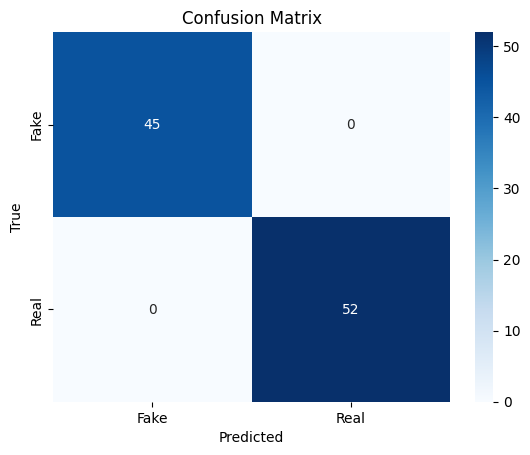

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "Real"], yticklabels=["Fake", "Real"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()
